The objective of this notebook is to determine the most accurate model which can be used to predict EPL team winners (home or away).

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
data_11_12 = pd.read_csv("11_12.csv", parse_dates=True)
data_12_13 = pd.read_csv("12_13.csv", parse_dates=True)
data_13_14 = pd.read_csv("13_14.csv", parse_dates=True)
data_14_15 = pd.read_csv("14_15.csv", parse_dates=True)
data_15_16 = pd.read_csv("15_16.csv", parse_dates=True)
data_16_17 = pd.read_csv("16_17.csv", parse_dates=True)
data_17_18 = pd.read_csv("17_18.csv", parse_dates=True)
data_18_19 = pd.read_csv("18_19.csv", parse_dates=True)
data_19_20 = pd.read_csv("19_20.csv", parse_dates=True)
data_20_21 = pd.read_csv("20_21.csv", parse_dates=True)

df = pd.concat([data_11_12 , data_12_13 , data_13_14 , data_14_15 , data_15_16 , data_16_17 , 
                data_17_18 , data_18_19 , data_19_20 , data_20_21] , axis=0 , join='inner')


df.tail(20)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA
360,E0,18/05/2021,Man United,Fulham,1.0,1.0,D,1.0,0.0,H,L Mason,13.0,8.0,6.0,5.0,10.0,15.0,6.0,1.0,2.0,3.0,0.0,0.0,1.28,6.00,9.00,1.30,5.75,9.00,1.33,5.50,8.25,1.30,5.5,9.00,1.30,5.75,9.50
361,E0,18/05/2021,Southampton,Leeds,0.0,2.0,A,0.0,0.0,D,P Bankes,18.0,15.0,3.0,7.0,10.0,12.0,4.0,5.0,0.0,3.0,0.0,0.0,2.55,3.90,2.50,2.70,3.75,2.40,2.55,3.75,2.55,2.62,3.6,2.50,2.63,3.75,2.55
362,E0,18/05/2021,Brighton,Man City,3.0,2.0,H,0.0,1.0,A,S Attwell,19.0,8.0,6.0,4.0,13.0,11.0,5.0,3.0,3.0,3.0,0.0,1.0,7.00,4.50,1.45,6.75,4.40,1.48,6.50,4.40,1.50,7.00,4.2,1.47,7.50,4.50,1.45
363,E0,18/05/2021,Chelsea,Leicester,2.0,1.0,H,0.0,0.0,D,M Dean,17.0,7.0,6.0,3.0,15.0,16.0,6.0,5.0,2.0,4.0,0.0,0.0,1.70,3.75,5.00,1.70,3.70,5.25,1.70,3.65,5.25,1.70,3.6,5.25,1.70,3.70,5.50
364,E0,19/05/2021,Everton,Wolves,1.0,0.0,H,0.0,0.0,D,A Madley,14.0,9.0,4.0,3.0,11.0,11.0,7.0,12.0,0.0,2.0,0.0,0.0,1.85,3.60,4.20,1.90,3.70,4.00,1.90,3.55,4.20,1.88,3.4,4.20,1.85,3.50,4.50
365,E0,19/05/2021,Newcastle,Sheffield United,1.0,0.0,H,1.0,0.0,H,R Jones,16.0,11.0,5.0,1.0,7.0,7.0,5.0,2.0,0.0,2.0,0.0,0.0,1.72,3.80,4.75,1.75,3.80,4.75,1.73,3.85,4.60,1.73,3.7,4.75,1.73,3.80,4.80
366,E0,19/05/2021,Tottenham,Aston Villa,1.0,2.0,A,1.0,2.0,A,C Pawson,10.0,20.0,4.0,4.0,14.0,13.0,4.0,5.0,1.0,1.0,0.0,0.0,1.50,4.50,6.00,1.53,4.50,5.75,1.53,4.70,5.50,1.50,4.4,6.00,1.50,4.60,6.00
367,E0,19/05/2021,Crystal Palace,Arsenal,1.0,3.0,A,0.0,1.0,A,A Taylor,12.0,6.0,6.0,3.0,7.0,7.0,6.0,7.0,2.0,1.0,0.0,0.0,6.00,4.50,1.50,5.75,4.40,1.55,5.75,4.40,1.55,6.50,4.2,1.50,6.50,4.33,1.50
368,E0,19/05/2021,Burnley,Liverpool,0.0,3.0,A,0.0,1.0,A,C Kavanagh,10.0,20.0,4.0,3.0,10.0,7.0,6.0,7.0,0.0,0.0,0.0,0.0,11.00,7.00,1.22,10.50,6.50,1.25,11.00,7.00,1.22,11.00,6.0,1.24,11.50,7.00,1.22
369,E0,19/05/2021,West Brom,West Ham,1.0,3.0,A,1.0,1.0,D,M Oliver,14.0,21.0,4.0,9.0,8.0,11.0,6.0,8.0,2.0,2.0,0.0,0.0,5.00,4.33,1.60,5.25,4.20,1.62,5.25,4.30,1.60,5.25,4.2,1.60,5.50,4.20,1.60


In [4]:
data_17_18.shape

(380, 65)

In [5]:
df.shape

(3801, 38)

Handling missing values:

In [6]:
df.isna().any()

Div         True
Date        True
HomeTeam    True
AwayTeam    True
FTHG        True
FTAG        True
FTR         True
HTHG        True
HTAG        True
HTR         True
Referee     True
HS          True
AS          True
HST         True
AST         True
HF          True
AF          True
HC          True
AC          True
HY          True
AY          True
HR          True
AR          True
B365H       True
B365D       True
B365A       True
BWH         True
BWD         True
BWA         True
IWH         True
IWD         True
IWA         True
WHH         True
WHD         True
WHA         True
VCH         True
VCD         True
VCA         True
dtype: bool

In [7]:
df.dropna(subset=['HomeTeam' , 'AwayTeam'] , axis=0 , inplace=True) #dropping rows with missing values of Home and Away teams

In [8]:
df.isna().any()

Div         False
Date        False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTHG        False
HTAG        False
HTR         False
Referee     False
HS          False
AS          False
HST         False
AST         False
HF          False
AF          False
HC          False
AC          False
HY          False
AY          False
HR          False
AR          False
B365H       False
B365D       False
B365A       False
BWH          True
BWD          True
BWA          True
IWH          True
IWD          True
IWA          True
WHH         False
WHD         False
WHA         False
VCH         False
VCD         False
VCA         False
dtype: bool

Analysis:

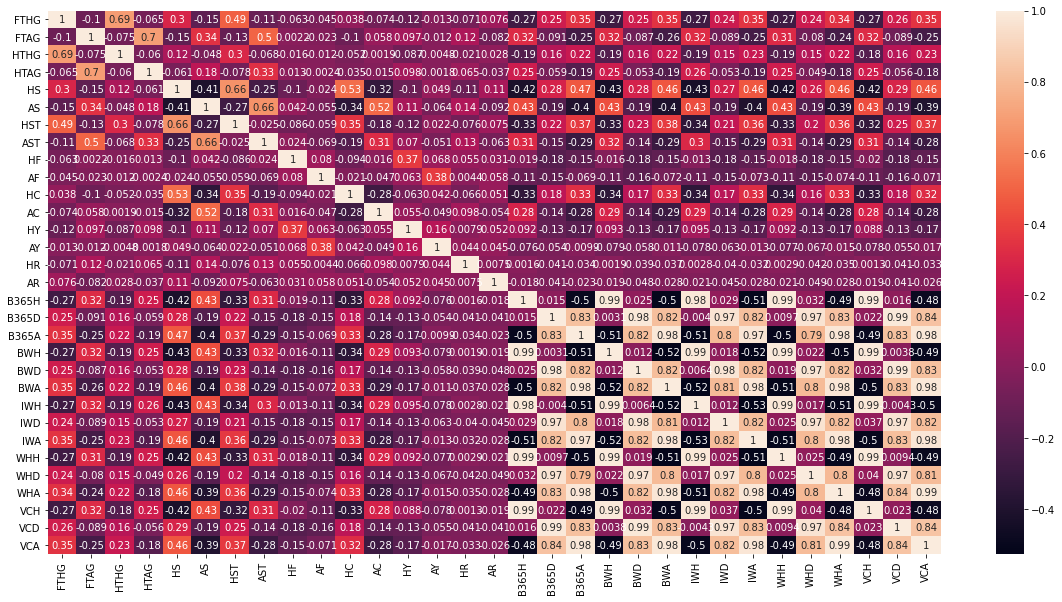

In [9]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot= True)

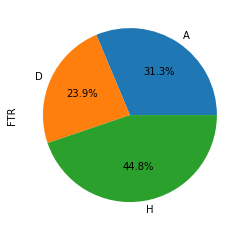

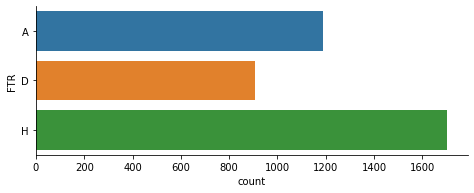

In [10]:
df.groupby('FTR')['FTR'].count().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))


ax = sns.catplot(y="FTR", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

The charts above indicate that the Home team are usually favourites.

Adding a 'season' column and 'total goals scored in a match' column for analysis:

In [11]:
df['season'] = [str(yr) + '_' + str(yr + 1) if mon >=8 and mon <=12 else str(yr-1) + '_' + str(yr) 
                for (yr , mon) in zip(pd.DatetimeIndex(df['Date']).year , pd.DatetimeIndex(df['Date']).month) ]

df['total_goals'] = df['FTHG'] + df['FTAG']

df.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA,season,total_goals
375,E0,23/05/2021,Liverpool,Crystal Palace,2.0,0.0,H,1.0,0.0,H,C Pawson,19.0,5.0,5.0,4.0,10.0,8.0,14.0,1.0,2.0,2.0,0.0,0.0,1.14,8.5,15.0,1.16,8.0,16.5,1.15,8.25,16.00,1.15,8.0,17.00,1.17,7.5,17.00,2020_2021,2.0
376,E0,23/05/2021,Man City,Everton,5.0,0.0,H,2.0,0.0,H,M Oliver,21.0,8.0,11.0,3.0,8.0,10.0,7.0,5.0,2.0,2.0,0.0,0.0,1.44,5.0,6.5,1.44,5.0,6.5,1.47,4.90,6.00,1.44,4.8,7.00,1.45,4.6,7.00,2020_2021,5.0
377,E0,23/05/2021,Sheffield United,Burnley,1.0,0.0,H,1.0,0.0,H,K Friend,12.0,10.0,3.0,3.0,11.0,1.0,8.0,9.0,3.0,1.0,0.0,0.0,2.80,3.6,2.4,2.80,3.6,2.4,2.85,3.60,2.40,2.80,3.5,2.45,2.88,3.5,2.40,2020_2021,1.0
378,E0,23/05/2021,West Ham,Southampton,3.0,0.0,H,2.0,0.0,H,M Atkinson,14.0,17.0,7.0,5.0,5.0,9.0,2.0,3.0,0.0,3.0,0.0,0.0,1.65,4.0,5.0,1.72,4.0,4.6,1.70,4.10,4.60,1.70,3.9,4.80,1.67,4.1,4.80,2020_2021,3.0
379,E0,23/05/2021,Wolves,Man United,1.0,2.0,A,1.0,2.0,A,M Dean,14.0,9.0,4.0,4.0,14.0,3.0,6.0,2.0,4.0,1.0,0.0,0.0,2.50,3.5,2.7,2.50,3.6,2.7,2.55,3.60,2.65,2.55,3.5,2.70,2.50,3.5,2.75,2020_2021,3.0


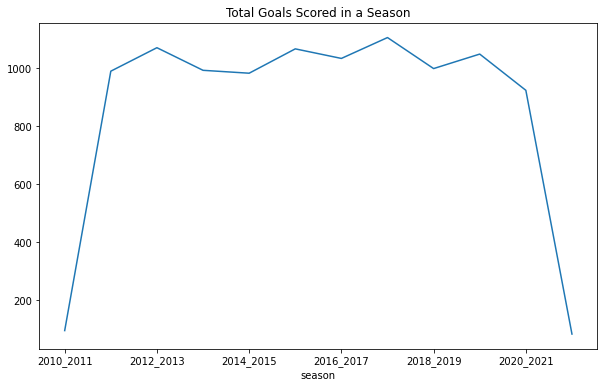

In [12]:
df.groupby('season')['total_goals'].sum().plot(figsize=(10,6))
plt.title("Total Goals Scored in a Season")
plt.show()

Dropping unnecessary betting columns:

In [13]:
df.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD','BWA', 'IWH', 'IWD', 'IWA',  'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA'] , axis=1 , inplace=True)

df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,season,total_goals
0,E0,13/08/11,Blackburn,Wolves,1.0,2.0,A,1.0,1.0,D,K Friend,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,2011_2012,3.0
1,E0,13/08/11,Fulham,Aston Villa,0.0,0.0,D,0.0,0.0,D,L Mason,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,2011_2012,0.0
2,E0,13/08/11,Liverpool,Sunderland,1.0,1.0,D,1.0,0.0,H,P Dowd,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,2011_2012,2.0
3,E0,13/08/11,Newcastle,Arsenal,0.0,0.0,D,0.0,0.0,D,P Walton,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,2011_2012,0.0
4,E0,13/08/11,QPR,Bolton,0.0,4.0,A,0.0,1.0,A,M Atkinson,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,2011_2012,4.0


#Chiq Sq Test for Feature Selection

In [15]:
df.dtypes

Div             object
Date            object
HomeTeam        object
AwayTeam        object
FTHG           float64
FTAG           float64
FTR             object
HTHG           float64
HTAG           float64
HTR             object
Referee         object
HS             float64
AS             float64
HST            float64
AST            float64
HF             float64
AF             float64
HC             float64
AC             float64
HY             float64
AY             float64
HR             float64
AR             float64
season          object
total_goals    float64
dtype: object

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

newdf.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,total_goals
0,1.0,2.0,1.0,1.0,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,0.0
4,0.0,4.0,0.0,1.0,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,4.0


In [17]:
label_encoder = LabelEncoder()

df['FTR'] = label_encoder.fit_transform(df['FTR'])

df['FTR'].head()

0    0
1    1
2    1
3    1
4    0
Name: FTR, dtype: int64

0 = Away win , 1 = Draw , 2 = Home win

In [18]:
from sklearn.feature_selection import chi2

X = newdf
Y = df['FTR']

chi_scores = chi2(X , Y)

chi_scores

(array([1819.78633046, 1961.31549462,  792.83630996,  842.43497064,
         464.8982457 ,  560.44583004,  900.71683271,  802.09366326,
           7.01814741,   22.27576572,   35.65628243,   16.97790203,
          53.09869724,    9.356048  ,   74.1751714 ,   39.083913  ,
         252.1301702 ]),
 array([0.00000000e+000, 0.00000000e+000, 6.88307920e-173, 1.16834323e-183,
        1.11848103e-101, 1.99863875e-122, 2.58121927e-196, 6.72316917e-175,
        2.99246206e-002, 1.45505340e-005, 1.80857552e-008, 2.05728953e-004,
        2.94960864e-012, 9.29736737e-003, 7.81746929e-017, 3.25863807e-009,
        1.78085754e-055]))

The first array represents chi square values while the second array represents p-values.

In [19]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

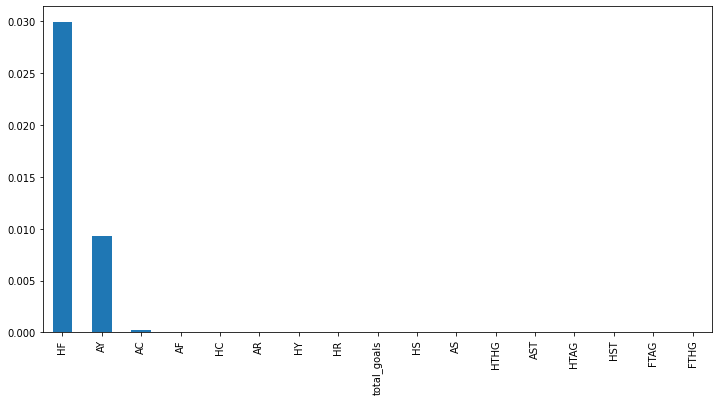

In [20]:
p_values.plot.bar(figsize = (12,6))

Because HF has a larger p-value, it means that this variable is unrelated to the repsone and so cannot be used in model training. Also, because yellow cards and fouls don't provide much information, and shots on target are better than random shots, these columns have been removed.

In [21]:
df.shape

(3800, 25)

In [22]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'season', 'total_goals'],
      dtype='object')

In [23]:
req_cols = ['HomeTeam' , 'AwayTeam' , 'HTHG' , 'HTAG' , 'HTR' , 'HST' , 'AST' , 'HC' , 'AC' , 'HR' , 'AR' , 'FTR']

final_df = df[req_cols]

final_df.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HST,AST,HC,AC,HR,AR,FTR
0,Blackburn,Wolves,1.0,1.0,D,8.0,4.0,12.0,6.0,0.0,0.0,0
1,Fulham,Aston Villa,0.0,0.0,D,9.0,1.0,2.0,3.0,0.0,0.0,1
2,Liverpool,Sunderland,1.0,0.0,H,4.0,6.0,6.0,3.0,0.0,0.0,1
3,Newcastle,Arsenal,0.0,0.0,D,1.0,4.0,2.0,5.0,0.0,1.0,1
4,QPR,Bolton,0.0,1.0,A,7.0,7.0,3.0,2.0,1.0,0.0,0


In [24]:
final_df['HomeTeam'] = label_encoder.fit_transform(final_df['HomeTeam'])
final_df['AwayTeam'] = label_encoder.fit_transform(final_df['AwayTeam'])

final_df['HTR'] = label_encoder.fit_transform(final_df['HTR'])

final_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HST,AST,HC,AC,HR,AR,FTR
0,2,34,1.0,1.0,1,8.0,4.0,12.0,6.0,0.0,0.0,0
1,11,1,0.0,0.0,1,9.0,1.0,2.0,3.0,0.0,0.0,1
2,16,27,1.0,0.0,2,4.0,6.0,6.0,3.0,0.0,0.0,1
3,20,0,0.0,0.0,1,1.0,4.0,2.0,5.0,0.0,1.0,1
4,22,3,0.0,1.0,0,7.0,7.0,3.0,2.0,1.0,0.0,0


#Splitting into Train/Test

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = final_df.drop(['FTR'] , axis=1)
y = final_df['FTR']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [45]:
X_train.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HST,AST,HC,AC,HR,AR
246,28,21,1.0,0.0,2,9.0,11.0,6.0,8.0,0.0,0.0
102,9,10,0.0,0.0,1,2.0,2.0,4.0,7.0,0.0,0.0
354,16,10,0.0,0.0,1,8.0,4.0,3.0,5.0,0.0,0.0
125,8,17,0.0,0.0,1,1.0,7.0,6.0,11.0,0.0,0.0
127,31,0,2.0,1.0,2,1.0,3.0,3.0,5.0,0.0,0.0


#Logistic Regression:

In [46]:
pipe =  make_pipeline(StandardScaler() , LogisticRegression(C=4 , multi_class='ovr' , max_iter=300 , random_state=0) )

pipe.fit(X_train , y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=4, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [47]:
pipe.score(X_test , y_test)

0.6671052631578948

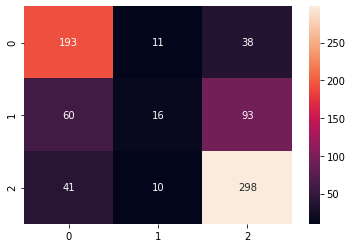

In [48]:
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test , y_pred)

sns.heatmap(cm, annot=True,fmt='d')

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       242
           1       0.43      0.09      0.16       169
           2       0.69      0.85      0.77       349

    accuracy                           0.67       760
   macro avg       0.59      0.58      0.55       760
weighted avg       0.62      0.67      0.62       760



#Support Vector Classification:

In [31]:
model = SVC(kernel='rbf' , random_state=0)

model.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
model.score(X_test , y_test)

0.6460526315789473

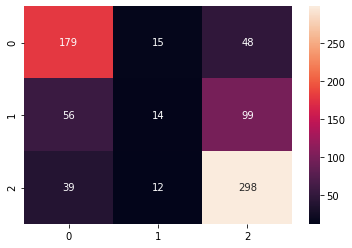

In [33]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test , y_pred)

sns.heatmap(cm, annot=True,fmt='d')

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       242
           1       0.34      0.08      0.13       169
           2       0.67      0.85      0.75       349

    accuracy                           0.65       760
   macro avg       0.55      0.56      0.53       760
weighted avg       0.59      0.65      0.60       760



#Random Forrest Classifier:

In [50]:
model = RandomForestClassifier(criterion='gini' ,  n_estimators=300 , 
                                                 min_samples_split=10 , oob_score=True , random_state=0) 

model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
model.score(X_test , y_test)

0.656578947368421

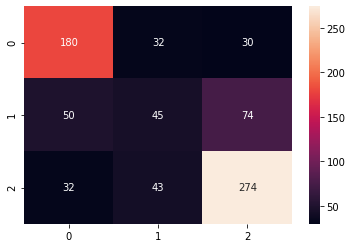

In [52]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test , y_pred)

sns.heatmap(cm, annot=True,fmt='d')

In [53]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       242
           1       0.38      0.27      0.31       169
           2       0.72      0.79      0.75       349

    accuracy                           0.66       760
   macro avg       0.60      0.60      0.59       760
weighted avg       0.64      0.66      0.64       760



#XGB Classifier:

In [54]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=700 , max_depth=1 )

model.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
model.score(X_test , y_test)

0.6710526315789473

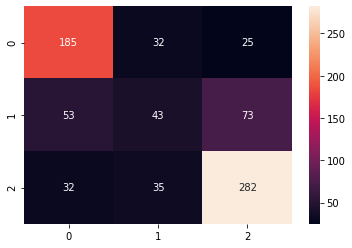

In [56]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test , y_pred)

sns.heatmap(cm, annot=True,fmt='d')

In [57]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       242
           1       0.39      0.25      0.31       169
           2       0.74      0.81      0.77       349

    accuracy                           0.67       760
   macro avg       0.61      0.61      0.60       760
weighted avg       0.65      0.67      0.65       760



From our analysis, we can see that XGBoost has the highest accuracy score of 67.5% and highest F1 score.